In [162]:
import numpy as np
import pandas as pd
import re

In [163]:
data=pd.read_excel('../Data/한국마사회_경주상세정보(제주_부경)_20230720.xlsx')

In [164]:
unicol_list = []
for col in data.columns:
    if data[1:][col].nunique()<=1:
        unicol_list.append(col)
drop_data = data.drop(unicol_list,axis=1) 

In [76]:
unicol_list[24:]

['BU_2F-G_TIME',
 'BU_3F-G_TIME',
 'BU_1F-G_TIME',
 'BU_S1F_ACC_TIME',
 'BU_G8F_ACC_TIME',
 'BU_G6F_ACC_TIME',
 'BU_G4F_ACC_TIME',
 'BU_G3F_ACC_TIME',
 'BU_G2F_ACC_TIME',
 'BU_G1F_ACC_TIME']

In [165]:
drop_data["WG"] = drop_data["WG_HR"].str.extract(r'(\d+)(?=\()')
drop_data["WG"][0]="마체중"

drop_data["WC"] = drop_data["WG_HR"].str.extract(r'\((.*?)\)')
drop_data["WC"][0] = "체중증감"

drop_data["WC"][1:] = pd.to_numeric(drop_data["WC"][1:])
drop_data["WG"][1:] = pd.to_numeric(drop_data["WG"][1:])

drop_data = drop_data.drop(["WG_HR"],axis=1)

In [166]:
#한글 이름을 열로 바꿔줌
drop_data.columns=drop_data.iloc[0]
drop_data=drop_data[1:]
drop_data

,경주일자,경주번호,경주거리,경주등급,날씨,주로상태(함수율),착순,출주번호,마명,마번,마필연령,마필성별,경주기록(초),경주마통산1착횟수,경주마통산2착횟수,경주마통산출전횟수,경주마최근1년1착횟수,경주마최근1년2착횟수,경주마최근1년출전횟수,부담중량,기수명,기수번호,기수연령,기수경력(년),기수통산1착횟수,기수통산2착횟수,기수통산출전횟수,기수최근1년간1착횟수,기수최근1년간2착횟수,기수최근1년간출전횟수,조교사명,조교사번호,조교사경력(년),조교사통산1착횟수,조교사통산2착횟수,조교사통산출전횟수,조교사최근1년간1착횟수,조교사최근1년간2착횟수,조교사최근1년간출전횟수,조교사위탁경주마1위횟수,조교사위탁경주마2위횟수,조교사위탁경주마출전횟수,"서울,제주S1F구간통과순위(서울,제주공통)","서울,제주1코너구간통과순위(서울,제주공통)","서울,제주2코너구간통과순위(서울,제주공통)","서울,제주3코너구간통과순위(서울,제주공통)","서울,제주4코너구간통과순위(서울,제주공통)","서울,제주G1F구간통과순위(서울,제주공통)",제주S-1F통과기록,제주1코너통과기록,제주2코너통과기록,제주3코너통과기록,제주G-3F통과기록,제주4코너통과기록,제주G-1F통과기록,마체중,체중증감
1,20230701,1,800,제6등급,흐림,포화 (18%),1,9,한백제왕,3101848,3,거,65.2,1,0,2,1,0,2,55,김준호,003081,30,9,411,337,3025,64,50,413,김영래,002019,27,1547,1235,10161,48,32,321,90,46,366,2,0,0,2,2,1,16.8,0,0,16.8,48.4,31.2,18.4,311,-18.0
2,20230701,1,800,제6등급,흐림,포화 (18%),2,2,명의로운,3102087,3,암,67.3,0,1,5,0,1,5,54,원유일,003075,36,13,444,469,4730,26,30,402,변용호,002013,29,1211,1313,12538,15,24,343,31,81,633,1,0,0,1,1,2,16.6,0,0,16.6,50.7,31.2,19.5,283,-6.0
3,20230701,1,800,제6등급,흐림,포화 (18%),3,3,번개의꿈,3101489,4,수,67.5,0,0,5,0,0,5,55,전현준,003070,35,18,959,810,6130,69,54,434,윤덕상,002021,27,1036,1279,12632,24,49,493,79,76,724,7,0,0,7,6,4,17.8,0,0,17.8,49.7,33,17.6,271,-5.0
4,20230701,1,800,제6등급,흐림,포화 (18%),4,6,고차원,3103528,2,암,67.6,0,0,3,0,0,3,54,이성민,003092,29,6,126,142,1573,28,36,389,윤덕상,002021,27,1036,1279,12632,24,49,493,79,76,724,6,0,0,6,7,5,17.6,0,0,17.6,50,33.2,17.7,265,-8.0
5,20230701,1,800,제6등급,흐림,포화 (18%),5,1,위너고,3102911,3,암,67.7,0,0,6,0,0,6,53,정명일,003044,48,27,704,668,6670,18,20,274,고성동,002008,32,1161,1232,12436,19,31,400,75,88,892,8,0,0,8,8,7,18.2,0,0,18.2,49.5,33.5,17.5,265,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29588,20190111,9,900,한4등급,흐림,양호 (8%),6,8,백년친구,1017787,3,암,64.1,2,3,15,0,0,0,54.5,권진영,003078,36,10,154,175,1960,0,0,0,박병진,002028,19,927,936,7980,39,35,381,184,192,1561,2,0,0,2,2,3,14.7,0,0,21.4,42.7,34.9,15,308,5.0
29589,20190111,9,900,한4등급,흐림,양호 (8%),7,3,미래제주,1017443,4,암,64.2,0,0,8,0,0,0,57,전현준,003070,35,18,959,810,6130,69,54,434,이준호,002029,17,666,702,6512,54,48,432,101,144,1151,4,0,0,4,4,4,15.2,0,0,21.9,42.3,35.2,14.9,311,-2.0
29590,20190111,9,900,한4등급,흐림,양호 (8%),8,1,남단여제,1017686,3,암,64.5,2,2,19,0,0,0,53,김이랑,003038,48,26,556,678,6435,0,0,0,신경호,002018,27,1021,1102,10781,41,50,350,112,104,1174,8,0,0,6,6,10,15.6,0,0,22.3,42.2,35.6,14.8,282,-4.0
29591,20190111,9,900,한4등급,흐림,양호 (8%),9,4,섬문화,1017765,4,암,64.6,0,2,26,0,0,0,54,문성호,003029,51,31,1141,1206,10297,22,18,233,좌윤철,002009,32,1078,1277,13727,33,27,360,74,98,1027,9,0,0,9,8,9,15.7,0,0,22.5,42.1,35.9,14.9,316,4.0


In [167]:
#1착, 2착 횟수가 높다고 좋은 것이 아니라 승률이 높아야 좋다고 생각하기에, 경주마, 기수, 조교수, 위탁 각각의 승률을 새로운 열에 추가해주었다.
drop_data['경주마통산1착승률']=drop_data['경주마통산1착횟수']/drop_data['경주마통산출전횟수'].replace(0,1)
drop_data['경주마통산2찬승률']=drop_data['경주마통산2착횟수']/drop_data['경주마통산출전횟수'].replace(0,1)
drop_data['경주마최근1년1착승률']=drop_data['경주마최근1년1착횟수']/drop_data['경주마최근1년출전횟수'].replace(0,1)
drop_data['경주마최근1년2착승률']=drop_data['경주마최근1년2착횟수']/drop_data['경주마최근1년출전횟수'].replace(0,1)

drop_data['기수통산1착승률']=drop_data['기수통산1착횟수']/drop_data['기수통산출전횟수'].replace(0,1)
drop_data['기수통산2착승률']=drop_data['기수통산2착횟수']/drop_data['기수통산출전횟수'].replace(0,1)
drop_data['기수최근1년간1착승률']=drop_data['기수최근1년간1착횟수']/drop_data['기수최근1년간출전횟수'].replace(0,1)
drop_data['기수최근1년간2착승률']=drop_data['기수최근1년간2착횟수']/drop_data['기수최근1년간출전횟수'].replace(0,1)

drop_data['조교사통산1착승률']=drop_data['조교사통산1착횟수']/drop_data['조교사통산출전횟수'].replace(0,1)
drop_data['조교사통산2착승률']=drop_data['조교사통산2착횟수']/drop_data['조교사통산출전횟수'].replace(0,1)
drop_data['조교사최근1년간1착승률']=drop_data['조교사최근1년간1착횟수']/drop_data['조교사최근1년간출전횟수'].replace(0,1)
drop_data['조교사최근1년간2착승률']=drop_data['조교사최근1년간2착횟수']/drop_data['조교사최근1년간출전횟수'].replace(0,1)

drop_data['조교사위탁경주마1위승률']=drop_data['조교사위탁경주마1위횟수']/drop_data['조교사위탁경주마출전횟수'].replace(0,1)
drop_data['조교사위탁경주마2위승률']=drop_data['조교사위탁경주마2위횟수']/drop_data['조교사위탁경주마출전횟수'].replace(0,1)


In [168]:
#주로상태(함수율) 데이터가 포화(18%)로 되어 있는 것을 포화, 18로 바꿔주었다.
drop_data[['주로상태','주로상태_함수율']]=drop_data['주로상태(함수율)'].str.extract(r'(.*?) \((\d+)%\)')
drop_data=drop_data.drop('주로상태(함수율)',axis=1)

In [169]:
drop_data[['혈통','등급']]=drop_data['경주등급'].str.extract(r'(\D)(.*)')

In [170]:
drop_data['혈통']=drop_data['혈통'].str.replace('제','제주').str.replace('한','한라')

In [171]:
drop_data=drop_data.drop('경주등급',axis=1)

In [73]:
drop_data.to_excel('경마데이터.xls',index=False)

C:\Users\wjswp\AppData\Local\Temp\ipykernel_16784\3188981914.py:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  drop_data.to_excel('경마데이터.xls',index=False)


In [173]:
#다시시작
horse_data=pd.read_excel('경마데이터.xls')
horse_data.columns
drop_feature=['마번','기수통산출전횟수','기수최근1년간출전횟수','날씨','경주마통산1착횟수','경주마통산2착횟수','경주마최근1년1착횟수','경주마최근1년2착횟수','기수명','기수번호','기수연령','기수통산1착횟수','기수통산2착횟수','기수최근1년간1착횟수','기수최근1년간2착횟수','조교사명','조교사번호','조교사통산1착횟수','조교사통산2착횟수','조교사최근1년간1착횟수','조교사최근1년간2착횟수','조교사위탁경주마1위횟수','조교사위탁경주마2위횟수','주로상태']
horse_data=horse_data.drop(columns=drop_feature)

In [20]:
np.unique(horse_data['경주거리'])
horse_data_800=horse_data[horse_data['경주거리']==800]
horse_data_900=horse_data[horse_data['경주거리']==900]
horse_data_1000=horse_data[horse_data['경주거리']==1000]
horse_data_1100=horse_data[horse_data['경주거리']==1100]
horse_data_1200=horse_data[horse_data['경주거리']==1200]
horse_data_1400=horse_data[horse_data['경주거리']==1400]
horse_data_1610=horse_data[horse_data['경주거리']==1610]
horse_data_1700=horse_data[horse_data['경주거리']==1700]
horse_data_1800=horse_data[horse_data['경주거리']==1800]

In [ ]:
pd.set_option('display.max_columns',None)
horse_data_800.columns
#서울제주 1코너 2코너
drop_feature_800=['서울,제주1코너구간통과순위(서울,제주공통)','서울,제주2코너구간통과순위(서울,제주공통)','제주1코너통과기록','제주2코너통과기록']
horse_data_800=horse_data_800.drop(columns=drop_feature_800)

In [233]:
majong_0=pd.read_excel('0~1000마종데이터.xls')
majong_1=pd.read_excel('1001~1500마종데이터.xls')
majong_2=pd.read_excel('1501~마종데이터.xls')
print(majong_1)


        ini_price                                              sicks  \
0            자가생산  ['좌전지파행 2023/02/26', '양전지파행 2023/02/25', '좌전지파...   
1    35,000천원(개별)  ['정치 2023/05/08', '낭치 2023/05/08', '감기 2020/04...   
2    10,000천원(개별)  ['임신검사 2020/03/18', '임신검사 2019/11/21', '정치 201...   
3    35,000천원(개별)  ['좌전지파행 2020/12/06', '좌전지파행 2020/12/05', '좌전지파...   
4    10,000천원(개별)                                                 []   
..            ...                                                ...   
494           NaN  ['감기 2021/08/06', '감기 2021/08/05', '감기 2021/08...   
495           NaN                                                 []   
496  36,997천원(개별)  ['좌전지파행 2022/11/13', '좌전지파행 2022/10/15', '우전지파...   
497  29,000천원(개별)              ['우전지파행 2021/09/12', '정치 2021/08/05']   
498          자가생산  ['양전지파행 2023/07/27', '정치 2021/07/08', '낭치 2021...   

                                                 ranks  \
0    ['제3 2023/01/08 ~ 현재', '제4 2021/07/04 ~ 2023/0...   
1    ['제4 2023/08/1

In [234]:
#len(pd.concat([majong_0,majong_1,majong_2]))
horse_list=pd.read_csv("../Data/horse_list.csv")
#len(horse_list)
#majong_0 1000개
#majong_1 499개
#2001개 1개는 majong_1 1번 돌풍신화 index=1000
#1개는 majong_2 1번 황룡시대 추가 index=1500
horse_list.drop([1000,1500],inplace=True)
horse_list=horse_list['0']


In [235]:

majong_data=pd.concat([majong_0,majong_1,majong_2])
majong_data['name']=horse_list

In [236]:
majong_feature=['ranks','horse_rate','dad_record','dad_rate','mom_record','mom_rate','name']
majong_data=majong_data[majong_feature]

In [260]:
majong_data.reset_index(drop=True,inplace=True)
dad_rate=np.zeros(len(majong_data))
mom_rate=np.zeros(len(majong_data))
dad_total3=np.zeros(len(majong_data))
mom_total3=np.zeros(len(majong_data))
dad_total=np.zeros(len(majong_data))
mom_total=np.zeros(len(majong_data))

#아빠 승률
for i in range(len(majong_data)):
    dad=majong_data['dad_record'][i]
    if (dad=='None' or dad=='전 (////)' or dad=='0전 (0/0/0/0/0)'):
        dad_rate[i]=None
        dad_total3[i]=None
        dad_total[i]=None
    else:
        b=re.findall(r'\d+',dad)
        b=list(map(int,b))
        dad_rate[i]=round((b[1]+b[2]+b[3])/b[0],2)
        dad_total3[i]=b[1]+b[2]+b[3]
        dad_total[i]=b[0]

#엄마 승률
for i in range(len(majong_data)):
    mom=majong_data['mom_record'][i]
    if (mom=='None' or mom=='전 (////)' or mom=='0전 (0/0/0/0/0)'):
        mom_rate[i]=None
        mom_total3[i]=None
        mom_total[i]=None
    else:
        b=re.findall(r'\d+',mom)
        b=list(map(int,b))
        mom_rate[i]=round((b[1]+b[2]+b[3])/b[0],2)
        mom_total3[i]=b[1]+b[2]+b[3]
        mom_total[i]=b[0]

In [261]:
majong_data['mom_rating']=mom_rate
majong_data['dad_rating']=dad_rate
majong_data['mom_total_in3']=mom_total3
majong_data['dad_total_in3']=dad_total3
majong_data['mom_total']=mom_total
majong_data['dad_total']=dad_total
majong_data.to_excel('majong_tochang_ver_2.xlsx')

In [247]:
result_vec=[]
for j in range(len(majong_data)):
    a=majong_data['horse_rate'][j]
    b=eval(a)
    date_list=[]
    number_list=[]
    for i in b:
        match=re.search(r'(\d{4}/\d{2}/\d{2})-\d+[Rr] (\d+)', i)
        if match:
            date = int(match.group(1).replace('/', ''))
            number = int(match.group(2))
            date_list.append(date)
            number_list.append(number)
        else:
            pass
    result_matrix=[majong_data['name'][j],date_list,number_list]
    result_vec.append(result_matrix)

#result_vec[i][0]는 이름
#result_vec[i][1]는 날짜
#result_vec[i][2]는 레이팅

'무대바람'

In [310]:
name=[]
for i in range(len(result_vec)):
    name.append(result_vec[i][0])
for i in name:
    if i=="한백제왕":
        print("a")

In [300]:
a=0
for i in range(len(result_vec)):
    a=a+len(result_vec[i][1])
a

30256

In [293]:
a=np.zeros(28841)
horse_data['레이팅']=None
horse_data
for i in range(len(result_vec)):
    for k in range(len(result_vec[i][1])):
        horse_data.loc[(horse_data['마명']==result_vec[i][0]) & (horse_data['경주일자']==result_vec[i][1][k]),'레이팅']=result_vec[i][2][k]
horse_data

,경주일자,경주번호,경주거리,착순,출주번호,마명,마필연령,마필성별,경주기록(초),경주마통산출전횟수,경주마최근1년출전횟수,부담중량,기수경력(년),조교사경력(년),조교사통산출전횟수,조교사최근1년간출전횟수,조교사위탁경주마출전횟수,"서울,제주S1F구간통과순위(서울,제주공통)","서울,제주1코너구간통과순위(서울,제주공통)","서울,제주2코너구간통과순위(서울,제주공통)","서울,제주3코너구간통과순위(서울,제주공통)","서울,제주4코너구간통과순위(서울,제주공통)","서울,제주G1F구간통과순위(서울,제주공통)",제주S-1F통과기록,제주1코너통과기록,제주2코너통과기록,제주3코너통과기록,제주G-3F통과기록,제주4코너통과기록,제주G-1F통과기록,마체중,체중증감,경주마통산1착승률,경주마통산2찬승률,경주마최근1년1착승률,경주마최근1년2착승률,기수통산1착승률,기수통산2착승률,기수최근1년간1착승률,기수최근1년간2착승률,조교사통산1착승률,조교사통산2착승률,조교사최근1년간1착승률,조교사최근1년간2착승률,조교사위탁경주마1위승률,조교사위탁경주마2위승률,주로상태_함수율,혈통,등급,레이팅
0,20230701,1,800,1,9,한백제왕,3,거,65.2,2,2,55.0,9,27,10161.0,321.0,366,2,0,0,2,2,1,16.8,0.0,0.0,16.8,48.4,31.2,18.4,311,-18.0,0.500000,0.000000,0.5,0.0,0.135868,0.111405,0.154964,0.121065,0.152249,0.121543,0.149533,0.099688,0.245902,0.125683,18,제주,6등급,None
1,20230701,1,800,2,2,명의로운,3,암,67.3,5,5,54.0,13,29,12538.0,343.0,633,1,0,0,1,1,2,16.6,0.0,0.0,16.6,50.7,31.2,19.5,283,-6.0,0.000000,0.200000,0.0,0.2,0.093869,0.099154,0.064677,0.074627,0.096586,0.104722,0.043732,0.069971,0.048973,0.127962,18,제주,6등급,None
2,20230701,1,800,3,3,번개의꿈,4,수,67.5,5,5,55.0,18,27,12632.0,493.0,724,7,0,0,7,6,4,17.8,0.0,0.0,17.8,49.7,33.0,17.6,271,-5.0,0.000000,0.000000,0.0,0.0,0.156444,0.132137,0.158986,0.124424,0.082014,0.101251,0.048682,0.099391,0.109116,0.104972,18,제주,6등급,None
3,20230701,1,800,4,6,고차원,2,암,67.6,3,3,54.0,6,27,12632.0,493.0,724,6,0,0,6,7,5,17.6,0.0,0.0,17.6,50.0,33.2,17.7,265,-8.0,0.000000,0.000000,0.0,0.0,0.080102,0.090273,0.071979,0.092545,0.082014,0.101251,0.048682,0.099391,0.109116,0.104972,18,제주,6등급,None
4,20230701,1,800,5,1,위너고,3,암,67.7,6,6,53.0,27,32,12436.0,400.0,892,8,0,0,8,8,7,18.2,0.0,0.0,18.2,49.5,33.5,17.5,265,-2.0,0.000000,0.000000,0.0,0.0,0.105547,0.100150,0.065693,0.072993,0.093358,0.099067,0.047500,0.077500,0.084081,0.098655,18,제주,6등급,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29587,20190111,9,900,6,8,백년친구,3,암,64.1,15,0,54.5,10,19,7980.0,381.0,1561,2,0,0,2,2,3,14.7,0.0,0.0,21.4,42.7,34.9,15.0,308,5.0,0.133333,0.200000,0.0,0.0,0.078571,0.089286,0.000000,0.000000,0.116165,0.117293,0.102362,0.091864,0.117873,0.122998,8,한라,4등급,None
29588,20190111,9,900,7,3,미래제주,4,암,64.2,8,0,57.0,18,17,6512.0,432.0,1151,4,0,0,4,4,4,15.2,0.0,0.0,21.9,42.3,35.2,14.9,311,-2.0,0.000000,0.000000,0.0,0.0,0.156444,0.132137,0.158986,0.124424,0.102273,0.107801,0.125000,0.111111,0.087750,0.125109,8,한라,4등급,None
29589,20190111,9,900,8,1,남단여제,3,암,64.5,19,0,53.0,26,27,10781.0,350.0,1174,8,0,0,6,6,10,15.6,0.0,0.0,22.3,42.2,35.6,14.8,282,-4.0,0.105263,0.105263,0.0,0.0,0.086402,0.105361,0.000000,0.000000,0.094704,0.102217,0.117143,0.142857,0.095400,0.088586,8,한라,4등급,None
29590,20190111,9,900,9,4,섬문화,4,암,64.6,26,0,54.0,31,32,13727.0,360.0,1027,9,0,0,9,8,9,15.7,0.0,0.0,22.5,42.1,35.9,14.9,316,4.0,0.000000,0.076923,0.0,0.0,0.110809,0.117121,0.094421,0.077253,0.078531,0.093028,0.091667,0.075000,0.072055,0.095424,8,한라,4등급,None


In [286]:
horse_data(horse_data['경주일자']>20220700) and (horse_data['경주일자']<20230632)

0         True
1         True
2         True
3         True
4         True
         ...  
29587    False
29588    False
29589    False
29590    False
29591    False
Name: 경주일자, Length: 28841, dtype: bool

In [199]:
print(horse_data[(horse_data['경주일자']==20201219) & (horse_data['마명']=='무대바람')]['착순'])
print(horse_data[(horse_data['경주일자']==20201219) & (horse_data['마명']=='무대바람')]['착순'])
print(horse_data[(horse_data['경주일자']==20201219) & (horse_data['마명']=='무대바람')]['착순'])
print(horse_data[(horse_data['경주일자']==20201219) & (horse_data['마명']=='무대바람')]['착순'])
print(horse_data[(horse_data['경주일자']==20201219) & (horse_data['마명']=='무대바람')]['착순'])

17030    6
Name: 착순, dtype: int64
17030    6
Name: 착순, dtype: int64
17030    6
Name: 착순, dtype: int64
17030    6
Name: 착순, dtype: int64
17030    6
Name: 착순, dtype: int64


0       -18.0
1        -6.0
2        -5.0
3        -8.0
4        -2.0
         ... 
29587     5.0
29588    -2.0
29589    -4.0
29590     4.0
29591    -7.0
Name: 체중증감, Length: 28841, dtype: float64

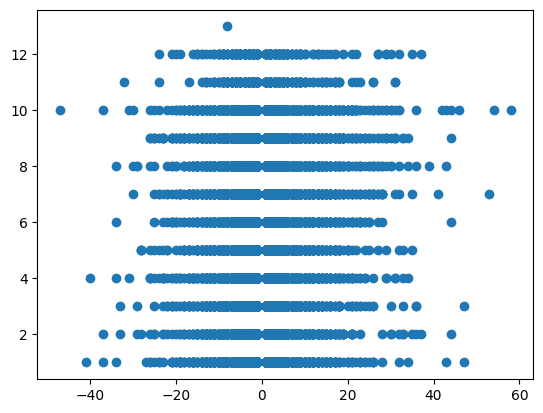

In [218]:
import numpy as np
import matplotlib.pyplot as plt

horse_data=horse_data[horse_data['착순']<80]
horse_data['착순']
horse_data['부담중량']
#plt.scatter(horse_data['부담중량'],horse_data['착순'])
corrr=np.corrcoef(horse_data['부담중량'],horse_data['착순'])[0,1]
plt.scatter(horse_data['체중증감'],horse_data['착순'])
np.corrcoef(horse_data['체중증감'],horse_data['착순'])[0,1]
horse_data['체중증감']

In [201]:
horse_data

,경주일자,경주번호,경주거리,착순,출주번호,마명,마필연령,마필성별,경주기록(초),경주마통산출전횟수,경주마최근1년출전횟수,부담중량,기수경력(년),조교사경력(년),조교사통산출전횟수,조교사최근1년간출전횟수,조교사위탁경주마출전횟수,"서울,제주S1F구간통과순위(서울,제주공통)","서울,제주1코너구간통과순위(서울,제주공통)","서울,제주2코너구간통과순위(서울,제주공통)","서울,제주3코너구간통과순위(서울,제주공통)","서울,제주4코너구간통과순위(서울,제주공통)","서울,제주G1F구간통과순위(서울,제주공통)",제주S-1F통과기록,제주1코너통과기록,제주2코너통과기록,제주3코너통과기록,제주G-3F통과기록,제주4코너통과기록,제주G-1F통과기록,마체중,체중증감,경주마통산1착승률,경주마통산2찬승률,경주마최근1년1착승률,경주마최근1년2착승률,기수통산1착승률,기수통산2착승률,기수최근1년간1착승률,기수최근1년간2착승률,조교사통산1착승률,조교사통산2착승률,조교사최근1년간1착승률,조교사최근1년간2착승률,조교사위탁경주마1위승률,조교사위탁경주마2위승률,주로상태_함수율,혈통,등급
0,20230701,1,800,1,9,한백제왕,3,거,65.2,2,2,55.0,9,27,10161.0,321.0,366,2,0,0,2,2,1,16.8,0.0,0.0,16.8,48.4,31.2,18.4,311,-18.0,0.500000,0.000000,0.5,0.0,0.135868,0.111405,0.154964,0.121065,0.152249,0.121543,0.149533,0.099688,0.245902,0.125683,18,제주,6등급
1,20230701,1,800,2,2,명의로운,3,암,67.3,5,5,54.0,13,29,12538.0,343.0,633,1,0,0,1,1,2,16.6,0.0,0.0,16.6,50.7,31.2,19.5,283,-6.0,0.000000,0.200000,0.0,0.2,0.093869,0.099154,0.064677,0.074627,0.096586,0.104722,0.043732,0.069971,0.048973,0.127962,18,제주,6등급
2,20230701,1,800,3,3,번개의꿈,4,수,67.5,5,5,55.0,18,27,12632.0,493.0,724,7,0,0,7,6,4,17.8,0.0,0.0,17.8,49.7,33.0,17.6,271,-5.0,0.000000,0.000000,0.0,0.0,0.156444,0.132137,0.158986,0.124424,0.082014,0.101251,0.048682,0.099391,0.109116,0.104972,18,제주,6등급
3,20230701,1,800,4,6,고차원,2,암,67.6,3,3,54.0,6,27,12632.0,493.0,724,6,0,0,6,7,5,17.6,0.0,0.0,17.6,50.0,33.2,17.7,265,-8.0,0.000000,0.000000,0.0,0.0,0.080102,0.090273,0.071979,0.092545,0.082014,0.101251,0.048682,0.099391,0.109116,0.104972,18,제주,6등급
4,20230701,1,800,5,1,위너고,3,암,67.7,6,6,53.0,27,32,12436.0,400.0,892,8,0,0,8,8,7,18.2,0.0,0.0,18.2,49.5,33.5,17.5,265,-2.0,0.000000,0.000000,0.0,0.0,0.105547,0.100150,0.065693,0.072993,0.093358,0.099067,0.047500,0.077500,0.084081,0.098655,18,제주,6등급
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29587,20190111,9,900,6,8,백년친구,3,암,64.1,15,0,54.5,10,19,7980.0,381.0,1561,2,0,0,2,2,3,14.7,0.0,0.0,21.4,42.7,34.9,15.0,308,5.0,0.133333,0.200000,0.0,0.0,0.078571,0.089286,0.000000,0.000000,0.116165,0.117293,0.102362,0.091864,0.117873,0.122998,8,한라,4등급
29588,20190111,9,900,7,3,미래제주,4,암,64.2,8,0,57.0,18,17,6512.0,432.0,1151,4,0,0,4,4,4,15.2,0.0,0.0,21.9,42.3,35.2,14.9,311,-2.0,0.000000,0.000000,0.0,0.0,0.156444,0.132137,0.158986,0.124424,0.102273,0.107801,0.125000,0.111111,0.087750,0.125109,8,한라,4등급
29589,20190111,9,900,8,1,남단여제,3,암,64.5,19,0,53.0,26,27,10781.0,350.0,1174,8,0,0,6,6,10,15.6,0.0,0.0,22.3,42.2,35.6,14.8,282,-4.0,0.105263,0.105263,0.0,0.0,0.086402,0.105361,0.000000,0.000000,0.094704,0.102217,0.117143,0.142857,0.095400,0.088586,8,한라,4등급
29590,20190111,9,900,9,4,섬문화,4,암,64.6,26,0,54.0,31,32,13727.0,360.0,1027,9,0,0,9,8,9,15.7,0.0,0.0,22.5,42.1,35.9,14.9,316,4.0,0.000000,0.076923,0.0,0.0,0.110809,0.117121,0.094421,0.077253,0.078531,0.093028,0.091667,0.075000,0.072055,0.095424,8,한라,4등급
